# LAB: quasi-Newton methods

Author : Alexandre Gramfort, Jair Montoya, Pierre Ablin

The objective of this lab session is to implement:
- Newton method
- DFP
- BFGS
- l-BFGS

And to investigate their behaviors.

You will need to use **line search methods**.

## VERY IMPORTANT

- This work **must be done by pairs of students**.
- **Each** student must send their work **before the 25th of november at 23:59**, using the **moodle platform**.
- This means that **each student in the pair sends the same file**
- On the moodle, in the "Optimization for Data Science" course, you have a "devoir" section called **Rendu TP du 25 novembre 2018**. This is where you submit your jupyter notebook file. 
- The **name of the file must be** constructed as in the next cell

# Gentle reminder: no evaluation if you don't respect this EXACTLY

### How to construct the name of your file

In [0]:
# Change here using YOUR first and last names
fn1 = "Adnan"
ln1 = "Asadullah"
fn2 = "Imad"
ln2 = "Al_moslli"

filename = "_".join(map(lambda s: s.strip().lower(), 
                        ["tp_newton", ln1, fn1, "and", ln2, fn2])) + ".ipynb"
print(filename)

tp_newton_asadullah_adnan_and_al_moslli_imad.ipynb


# Part 0: Demo using Gradient descent

First import the necessary libraries:

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

Now import the necessary function from the optim_utils.py file.

In [0]:
from optim_utils import test_solver

You'll only need the `test_solver` function.

This function expects a function as parameter.

The signature of the function `optimizer` to pass should be the following:

`optimizer(x0, f, f_grad, f_hessian)`

First, an example with a gradient descent.

In [0]:
def gradient_descent(x0, f, f_grad, f_hessian=None):

    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 200
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = False

    all_x_k, all_f_k = [], []
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    for k in range(1, max_iter + 1):

        grad_x = f_grad(x)

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              -grad_x, grad_x,
                                                              c1=c1, c2=c2)
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        x -= step * grad_x

        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break

    return np.array(all_x_k), np.array(all_f_k)

Now, call the `test_solver` function with this solver:


Running solver on case 1

Running solver on case 2

Running solver on case 3


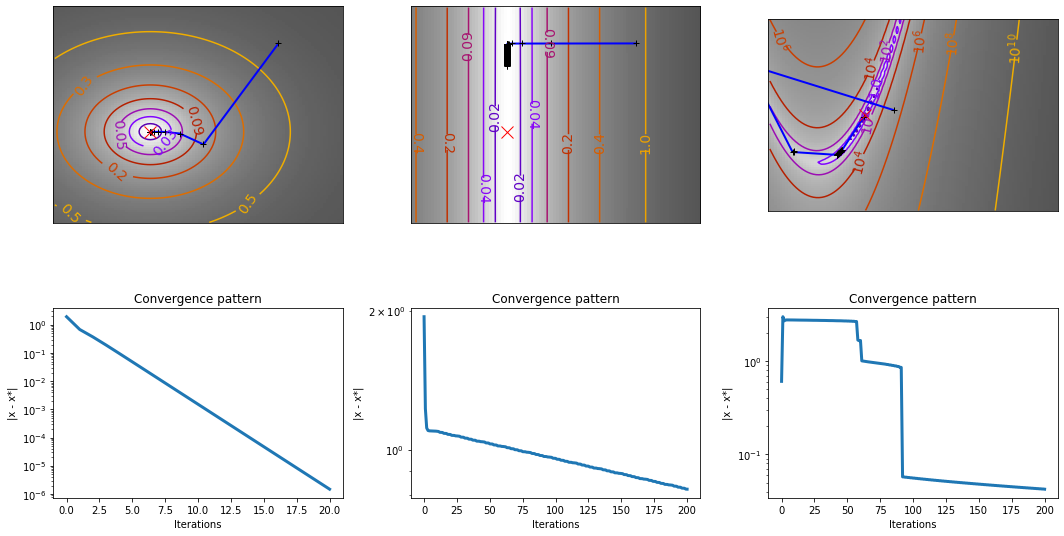

In [0]:
test_solver(gradient_descent)

It runs the algorithm on three functions:
- A non convex Gaussian kernel ($f(x) = -\exp(-x^2)$)
- A badly conditioned quadratic function (but still strongly convex)
- The Rosenbrock function
    

# Part 2: Implement Newton method

Implement Newton's method. Beware that the Hessian SHOULD be regularized !

**You are expected to comment** what you see. Play with the parameters. Do not describe the curves, rather

In [0]:
from scipy import linalg
from scipy.sparse.linalg import cg

def newton(x0, f, f_grad, f_hessian):
    #default_step = 0.01
    #c1 = 0.00001
    #c2 = 0.95
    #max_iter = 100
    #lambda_threshold = 0.0001 # regularization threshold
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = False

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    for k in range(1, max_iter + 1):

        grad_x = f_grad(x)
        
        # Compute the Hessian, regularize it and compute the search direction d
        
        # TODO H = ..
        H =f_hessian(x)
        eig=np.linalg.eigvalsh(H)
        smallest_eig=np.min(eig)
        if smallest_eig<lambda_threshold:
            H=H+(lambda_threshold-smallest_eig)*np.eye(len(x))
            
        d=-np.linalg.solve(H,grad_x)
        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        # Compute here the new value of x
        x += step * d

        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1

Running solver on case 2

Running solver on case 3


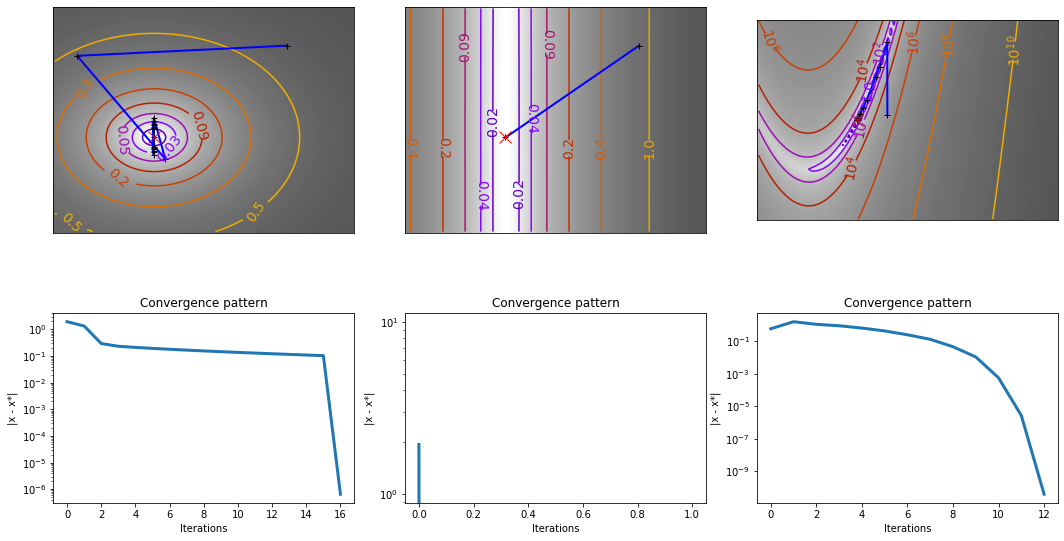

In [0]:
default_step = 0.01
c1 = 0.00001
c2 = 0.95
max_iter = 100
lambda_threshold = 0.0001 # regularization threshold
test_solver(newton)

### play with lambda threshold 


Running solver on case 1

Running solver on case 2

Running solver on case 3


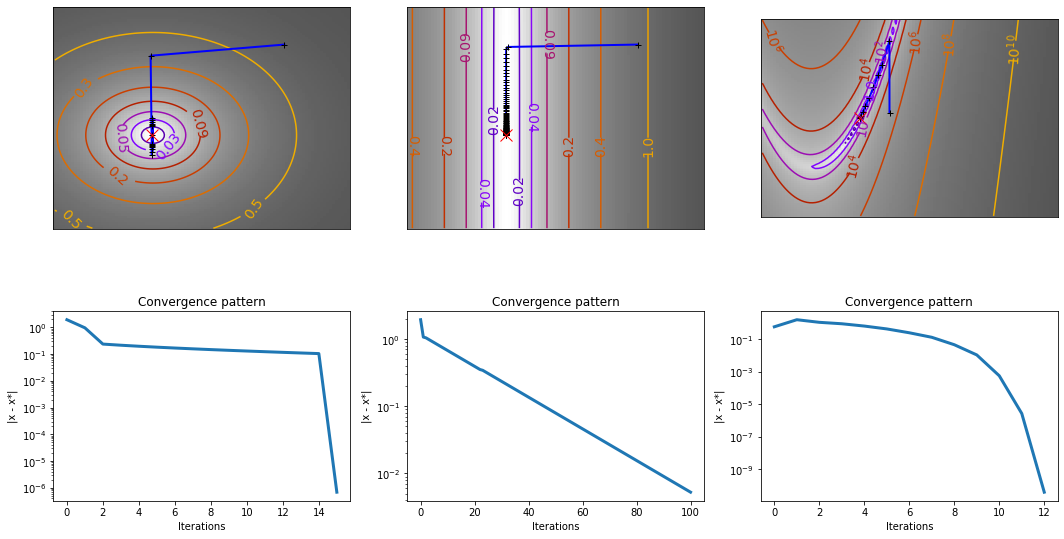

In [0]:
default_step = 0.01
c1 = 0.00001
c2 = 0.95
max_iter = 100
lambda_threshold = 0.01 # regularization threshold
test_solver(newton)

### play with C1


Running solver on case 1

Running solver on case 2

Running solver on case 3


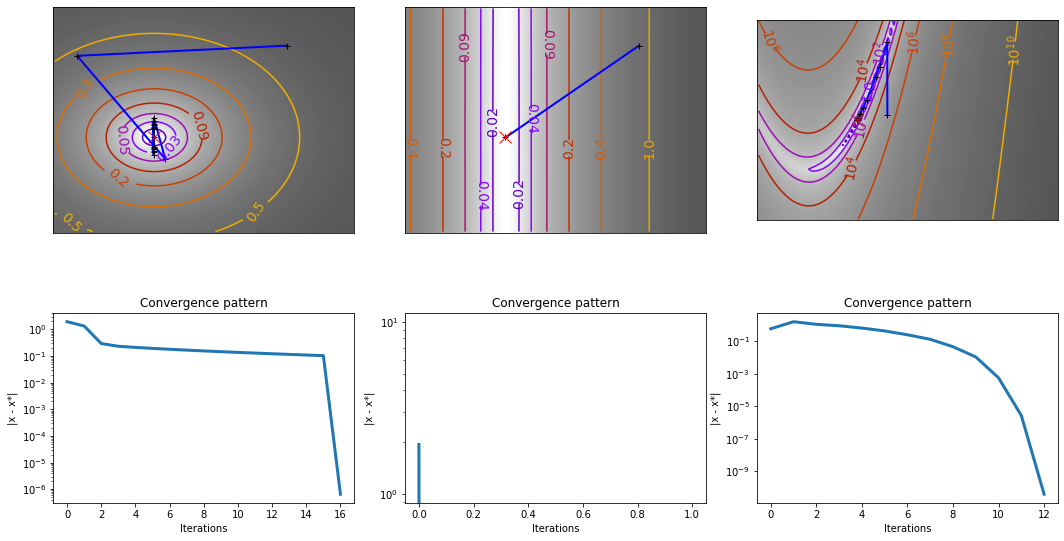

In [0]:
default_step = 0.01
c1 = 0.001
c2 = 0.95
max_iter = 100
lambda_threshold = 0.0001 # regularization threshold
test_solver(newton)


Running solver on case 1

Running solver on case 2

Running solver on case 3


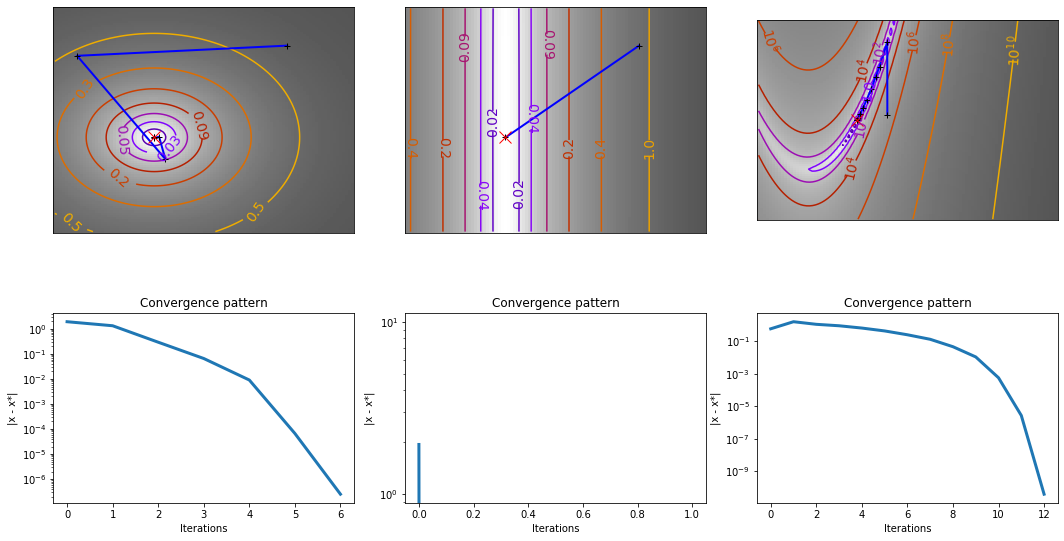

In [0]:
default_step = 0.01
c1 = 0.1
c2 = 0.95
max_iter = 100
lambda_threshold = 0.0001 # regularization threshold
test_solver(newton)

### play with C2


Running solver on case 1

Running solver on case 2

Running solver on case 3


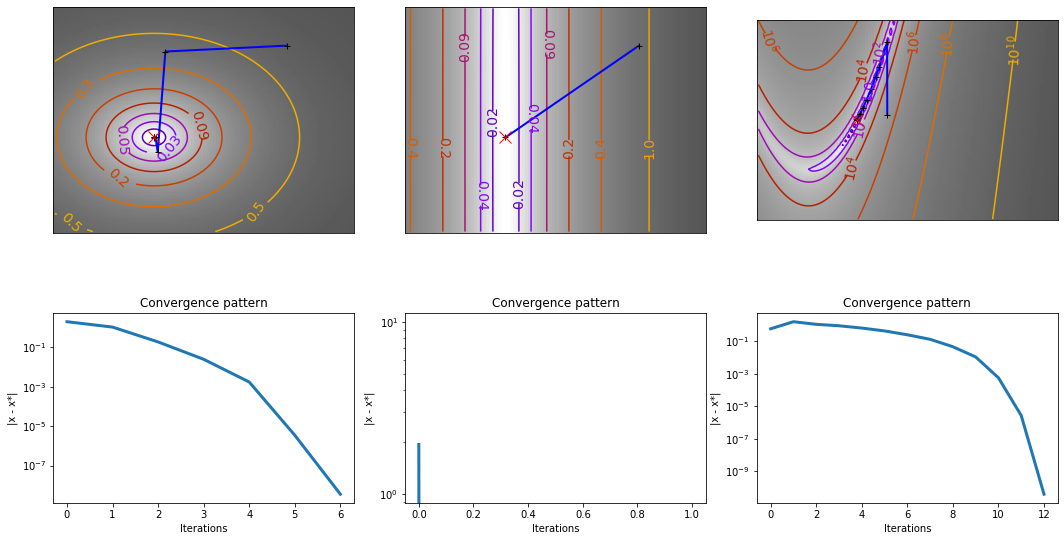

In [0]:
default_step = 0.01
c1 = 0.00001
c2 = 0.50
max_iter = 100
lambda_threshold = 0.0001 # regularization threshold
test_solver(newton)

### play with iteration



Running solver on case 1

Running solver on case 2

Running solver on case 3


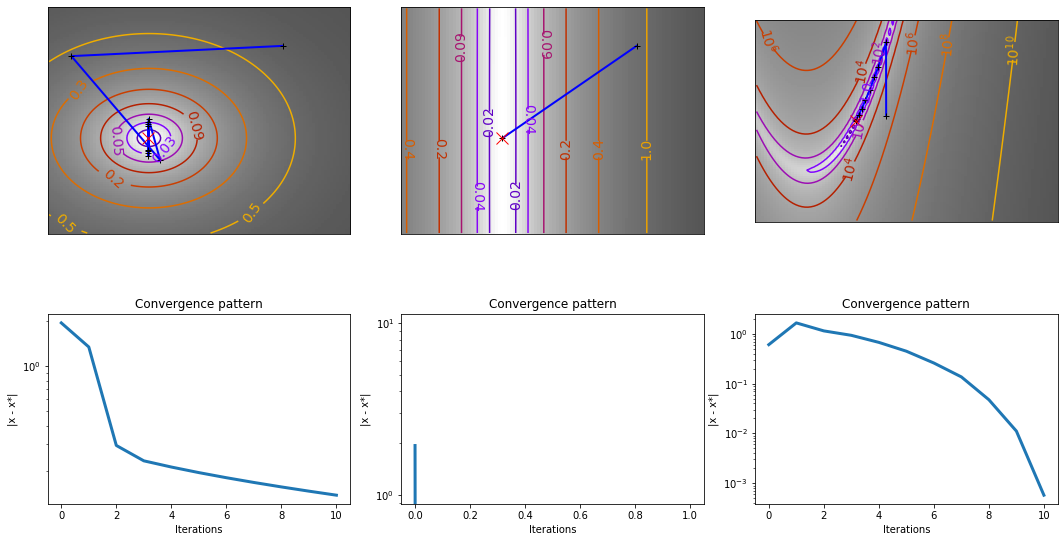

In [0]:
default_step = 0.01
c1 = 0.00001
c2 = 0.95
max_iter = 10
lambda_threshold = 0.0001 # regularization threshold
test_solver(newton)

**COMMENTS HERE**

- For a quadratic function, the Newton method converges in one iteration (if the regularizor is low enough) even if it is badly conditioned. If the regularization parameter is high, it modifies the structure of the objective function and it takes more time to comute the Hessian.

- As each iteration of the Newton method requires to solve a linear system, the convergence rate for the non convex Gaussian Kernel is slow at the beginning but then the minimum is found in one iteration as in the first case since the gassian Kernel form gets similar to a quadratic function when we are far from the center. The convergence is also strongly affected by the constant c1 and c2 of the line search as it is important to choose a good interval such that the portion of the curve that we study is close to a quadratic form. If it is the case, we don't converge in one iteration but faster.

- For the The Rosenbrock function, the convergence is not so much affected by the parameters we choose. It has a quadratic form and takes a dozen of iterations while it would take hundreds of iterations with a "steepest descent" method (as we have seen with Gradient Descent previously).

# Part 2: Implement DFP algorithm

Now, implement the DFP algorithm using the formula for $B$ in the slides.

**Comment on what you observe**. Focus on the explanation, not on describing the curves! 

Isn't there a contradiction on the quadratic functions with what we've seen in class? What is going on?

In [0]:
def dfp(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.95
    max_iter = 200
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = False

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    B = np.eye(len(x))  # inverse Hessian approximation, start from Id
    
    grad_x = f_grad(x)
    
    for k in range(1, max_iter + 1):       
        
        # Compute the search direction
        d = np.dot(B, -grad_x)

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
        
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        # Compute the new value of x
        s = step * d
        x = x + s
        y = new_grad - grad_x
        ################################################################
        # Update the inverse Hessian approximation
        
        # TODO B = ...
        B=B + np.outer(s,s)/np.dot(s.T,y) - np.outer(np.dot(B,y),np.dot(y.T,B))/np.dot(y.T,np.dot(B,y))
        
        ################################################################
        
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break
            
        grad_x = new_grad

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1

Running solver on case 2

Running solver on case 3


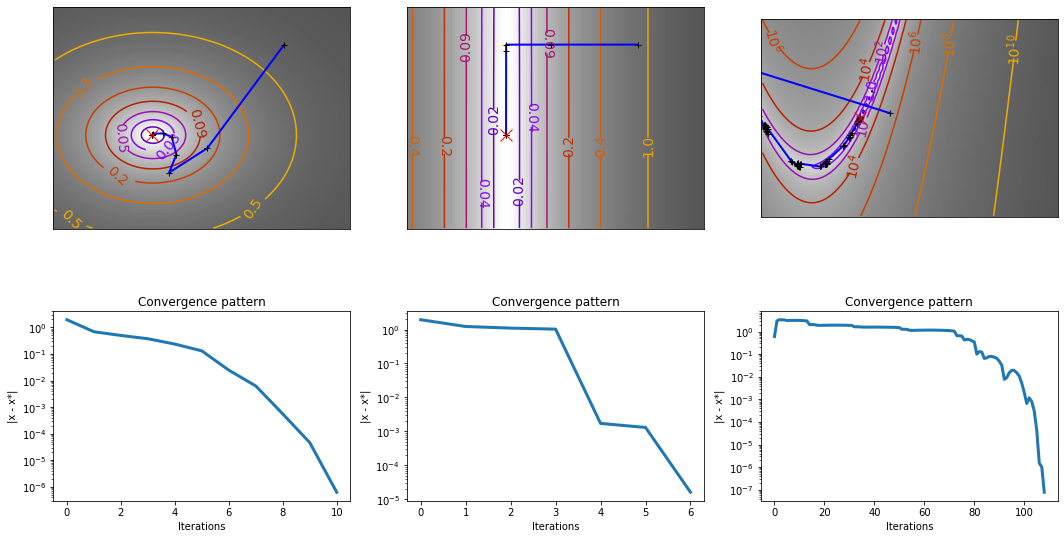

In [0]:
test_solver(dfp)

#### Your comments here

- For a quadratic function, DFP algorithm is similar to conjugate gradient and should therefore converge in at most n iterations. Here, we can see that it takes more iterations to converge. It is due to the fact that the function is badly conditioned. Indeed, as DFP formula is a rank 2 correction, it approximates the Hessian inverse by a matrix of rank 2 in each iteration : $B_{k+1} = B_k + uu^T + vv^T$ with $u = s_k$ and $v = B_ky_k$. 
However, with a bad conditionment, the Hessian will contain small singular values which will result in higher singular values for the inverse, implying more time to approximate it. Also, we can see that when it goes in one direction, it goes very far as the Hessian gives the direction. This imply that we are wasting time in the beginning when we go to the bad direction.

- In the general case, if the line search is exact, DFP method behaves like the Newton method close the the optimum.
We can well see this with the non convex Gaussian Kernel as it takes only 10 iterations. For the Rosenbrock function, it is less clear as it takes more than 100 iterations.




# Part 3: Implement BFGS algorithm

You should now implement BFGS, using the formula for $B_t$ seen in the slides.

**Comment** on what you see.

In [0]:
def bfgs(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = False

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    B = np.eye(len(x))  # Hessian approximation
    
    grad_x = f_grad(x)
    
    for k in range(1, max_iter + 1):       
        
        # Compute the search direction
        d = -np.dot(B, grad_x)

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
                
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        # Compute the new value of x
        s = step * d
        x += s
        y = new_grad - grad_x
        ##################################################################
        # Update the inverse Hessian approximation
        
        # TODO B = 
        p = len(x)
        rho = 1. / y.dot(s)
        B = (np.eye(p) - rho * np.outer(s, y)).dot(B).dot(np.eye(p) - rho * np.outer(y, s)) + rho * np.outer(s, s) 
        ##################################################################
        
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break
            
        grad_x = new_grad

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1

Running solver on case 2

Running solver on case 3


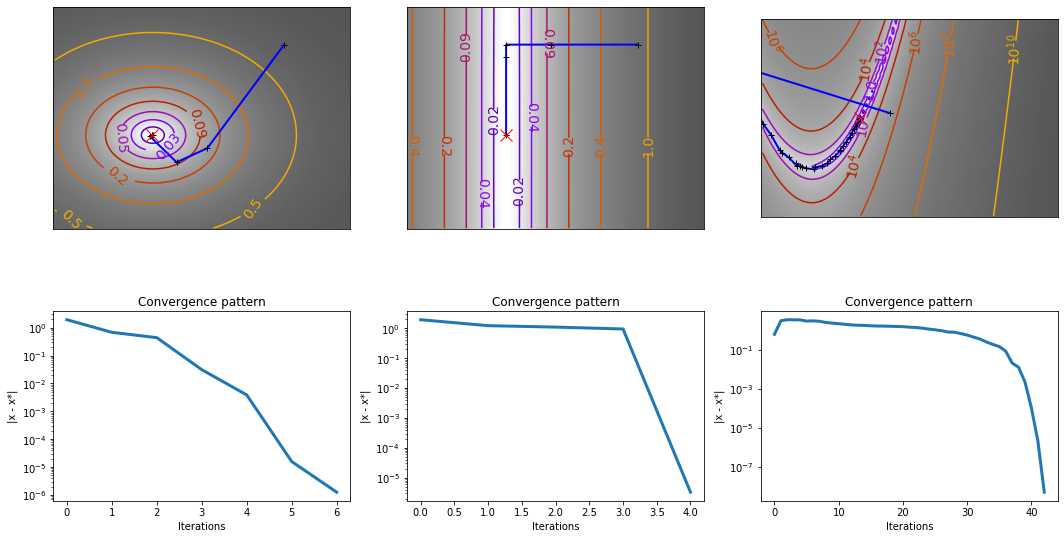

In [0]:
test_solver(bfgs)

#### Your comments here

- The BFGS algorithm has the same complexity as DFP algorithm and the same property in the quadratic case. However, we can see it converges faster in the 3 cases.
- Indeed, BFGS algorithm approximates the Hessian itself, not its inverse and it may better suited in the case of a bad conditioned Hessian matrix.
- In practise, the update is done through a cholesky factorization : $H_k = C_kC_k^T$, which can also reduce computational time (even if it is not the matter here beacause we are looking at the number of iterations).
- Finally, BFGS is less sensitive to the line search approximation of the step size than DFP and we can see that it helps here in the sense that we have less changes of direction.

# Part 3: Implement l-BFGS algorithm

You should now implement the l-BFGS algorithm. First, code the two-loops recursion:

In [0]:
def two_loops(grad_x, m, s_list, y_list, rho_list, B0):
    '''
    Parameters
    ----------
    
    grad_x : ndarray, shape (p,)
        gradient at the current point
    
    m : int
        memory size
    
    s_list : list of length m
        the past m values of s
    
    y_list : list of length m
        the past m values of y

    rho_list : list of length m
        the past m values of rho
        
    B0 : ndarray, shape (p, p)
        Initial inverse Hessian guess
    
    Returns
    -------
    r :  ndarray, shape (p,)
        the L-BFGS direction
    '''
    q = grad_x.copy() #q = gk
    alpha_list = []
    
    # TODO : first loop
    for i in range(len(s_list)-1, -1, -1): #len(s_list) = m
        alpha_list.insert(0, rho_list[i] * np.dot(s_list[i],q))
        q -= alpha_list[0] * y_list[i]
    r = np.dot(B0, q) #r=z
    # TODO: second loop
    for i in range(len(s_list)):
        beta = rho_list[i] * np.dot(y_list[i],r)
        r  = r + (alpha_list[i] - beta) * s_list[i]
    return -r

In [0]:
def lbfgs(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    m = 2
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = False

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    B0 = np.eye(len(x))  # Hessian approximation
    
    grad_x = f_grad(x)
    
    y_list, s_list, rho_list = [], [], []
    for k in range(1, max_iter + 1):       
        
        # Compute the search direction
        d = two_loops(grad_x, m, s_list, y_list, rho_list, B0)

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
                
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        # Compute the new value of x
        s = step * d
        x += s
        y = new_grad - grad_x
        rho = 1 / np.dot(y, s)
        ##################################################################
        # Update the memory
        y_list.append(y.copy())
        s_list.append(s.copy())
        rho_list.append(rho)
        if len(y_list) > m:
            y_list.pop(0)
            s_list.pop(0)
            rho_list.pop(0)
        ##################################################################
        
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break
            
        grad_x = new_grad

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1

Running solver on case 2

Running solver on case 3


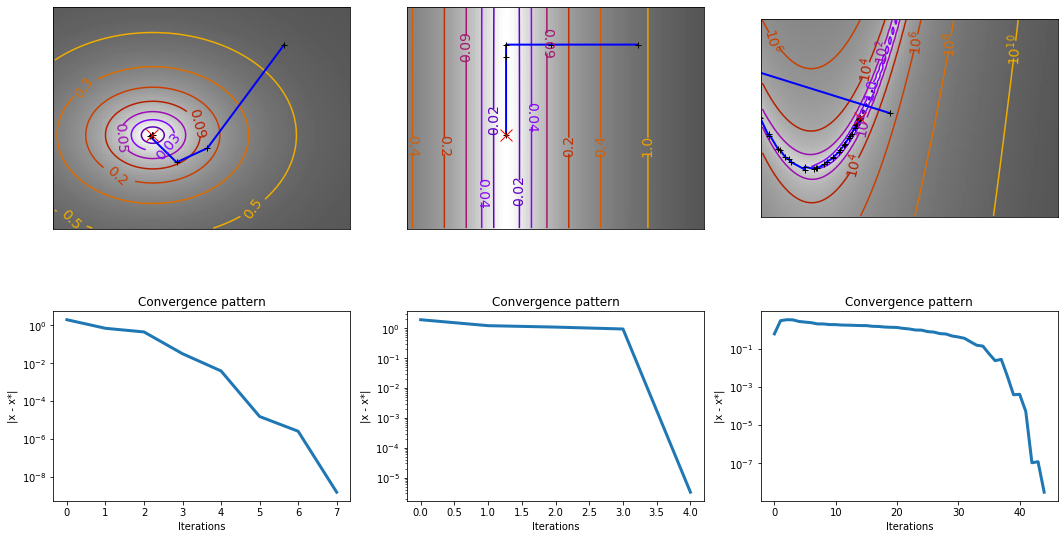

In [0]:
test_solver(lbfgs)

**Comment on what you observe**

The convergence of L-BFGS is almost the same as BFGS. Indeed L-BFGS is just a variant of BFGS which uses less memory. 
It takes one more iteration in the case of the non convex Gaussian Kernel and it has more variations in the case of the Rosenbrock function. It is due to the fact because it does not store the Hession nor the gradient, it approximates it using the last m values of $s_k$ and $y_k$. Here, the difference is not important because we are in low dimension and m is equal to the size of the vectors (m=2).
The convergence is exactly the same in the case of the quadratic function as L-BFGS has the same properties as BFGS.